In [97]:
import numpy as np
%matplotlib inline
from astropy import units
from astropy import constants
from astropy.table import Table
import matplotlib.pyplot as plt

from matplotlib.colors import LogNorm


import sys
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

from astropy.io import fits
from astropy.io import ascii
from astropy.table import QTable, Table
from astropy.wcs import WCS
import astropy.units as u

COLOR = 'k'#'#FFFAF1'
plt.rcParams['font.size'] = 9
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR

plt.rcParams['xtick.major.width'] = 1.5
plt.rcParams['ytick.major.width'] = 1.5
plt.rcParams['xtick.major.size']  = 5 #12
plt.rcParams['ytick.major.size']  = 5#12

plt.rcParams['xtick.minor.width'] = 1
plt.rcParams['ytick.minor.width'] = 1
plt.rcParams['xtick.minor.size']  = 2
plt.rcParams['ytick.minor.size']  = 2

plt.rcParams['axes.linewidth'] = 1.5

plt.rcParams['text.color'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
#plt.rcParams['axes.spines.top'] = False
#plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['axes.edgecolor'] = COLOR
plt.rcParams['figure.facecolor'] = 'none'
plt.rcParams['legend.facecolor'] = 'none'
from matplotlib.gridspec import GridSpec

In [98]:
from astropy.io import ascii

MySky -0.0109091


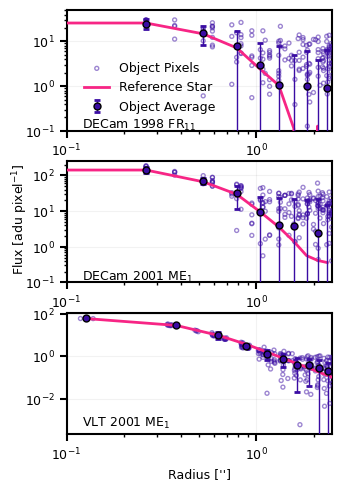

In [129]:
cm = 1/2.54  # centimeters in inches
fig, axs = plt.subplots(3, 1, tight_layout=False,figsize=(8.7*cm,14*cm),sharex=False,sharey=False
                       ,gridspec_kw={'hspace': 0.25, 'wspace': 0.3})
color1='#3a0ca3'
linewidth=1
size=30
smallsize=8
smallestsize=5
decamplot(axs[0])
decamplot(axs[1],infile ='2001_ME1_37_c4d_220512_082235_ooi_i_yse')
VLTplot(axs[2])

fs=9

axs[0].grid(color='k',alpha=0.05)
axs[1].grid(color='k',alpha=0.05)
axs[2].grid(color='k',alpha=0.05)

#axs[0].set_xlim([-0.1,2.7])
fig.text(-0.04, 0.5, r'Flux [adu pixel$^{-1}$]', va='center', rotation='vertical',fontsize=fs)

axs[2].set_xlabel('Radius [\'\']',fontsize=fs)

color1='#3a0ca3'

axs[0].legend(fancybox=True, framealpha=1, shadow=False, borderpad=.92,#,bbox_to_anchor=(1.05,1.1),
            frameon=False, loc='lower left', ncol=1)#,prop={'size': 15},facecolor='none')


#axs[0].set_xscale('log')
#axs[1].set_xscale('log')
#axs[2].set_xscale('log')
#axs[1].grid(color='k',alpha=0.05)
fs2=9
axs[0].annotate(r'DECam 1998 FR$_{11}$',(0.12,0.115),rotation=0,fontsize=fs2)
axs[1].annotate(r'DECam 2001 ME$_1$',(0.12,0.115),rotation=0,fontsize=fs2)

axs[2].annotate(r'VLT 2001 ME$_1$',(0.12,0.0005),rotation=0,fontsize=fs2)

axs[0].set_xscale('log')
axs[1].set_xscale('log')

axs[2].set_xscale('log')
axs[0].set_yscale('log')
axs[1].set_yscale('log')

axs[2].set_yscale('log')
axs[2].set_xlim([0.1,2.5])
axs[1].set_xlim([0.1,2.5])
axs[0].set_xlim([0.1,2.5])
#axs[1].set_xlim([-0.1,4])
plt.savefig('Figure6_Profiles_Vector.pdf',
            format='pdf',bbox_inches='tight', dpi=600)



In [128]:
#sys.argv[1]

def decamplot(ax,infile = '1998_FR11_10_c4d_160115_055620_ooi_r_ls9'):
    obox_smallIma = 15
    obox_ima = 30
    obox_largeIma = 200
    oprof = 10

    pix =  0.1943801 


    profC   = ascii.read(infile+ '_C.ecsv')
    profCav = ascii.read(infile+ '_Cav.ecsv')
    profSav = ascii.read(infile+ '_Sav.ecsv')

    skys = 10.

#     axs[0].plot(data_star[:,0],data_star[:,1],color='#f72585',lw=linewidth,label='Reference Star')
#     axs[0].errorbar(data_object[1:,0],data_object[1:,1],yerr=asymmetric_error,fmt='o',ms=smallestsize,lw=linewidth,capsize=2,
#                              capthick=2,color=color1,ecolor=color1,mec='#000000',zorder=5,label=r'2001 ME$_1$ Average')

#     axs[0].scatter(small_circles[:,0],small_circles[:,1],color='none',
#             marker='o',s=smallsize,lw=linewidth,label=r'2001 ME$_1$ Pixels'
#             ,edgecolor= '#3a0ca3',zorder=4,alpha=0.5)
#     axs[0].scatter(data_object[:,0],data_object[:,1],
#             c='#3a0ca3',marker='o',edgecolor= 'k', 
#             lw=linewidth,s=size,zorder=5)#,#label=r'2001 ME$_1$ ',zorder=5)

    fs=9

    #fig,ax = plt.subplots()

    ax.scatter(  profC['r_arcsec'], profC['flux_sky'], color='none',
             marker='o',s=smallsize,lw=linewidth,label=r'Object Pixels'
             ,edgecolor= '#3a0ca3',zorder=4,alpha=0.5)
    #ax.plot    ( profCav['r_arcsec'], profCav['flux_sky'], color='k')
    ax.errorbar( profCav['r_arcsec'], profCav['flux_sky'], yerr=profCav['flux_skys'],
                fmt='o',ms=smallestsize,lw=linewidth,capsize=2,
                              capthick=2,color=color1,ecolor=color1,
                mec='#000000',zorder=12,label=r'Object Average')
    ax.plot( profSav['r_arcsec'],
                profSav['flux_sky']/profSav['flux_sky'][0]*profCav['flux_sky'][0],
                color='#f72585',lw=linewidth*2,label='Reference Star',zorder=10)

    #ax.set_xlim(-0.1,(oprof+0.5)*pix)
    ax.set_ylim(-skys, max(profCav['flux_sky'])*10.1)
    ax.set_ylim(0.1, max(profCav['flux_sky'])*1.1)

    #ax.set_xlabel('Radius [arcsec]')
    #ax.set_ylabel('Flux [adu/pix]')
    return None

                        
#plt.savefig(infile+'.png')


In [127]:


def VLTplot(ax):
    rootFile = 'Sima_cM'
    profFile = rootFile+'_profAll.fits'
    profAvFile = rootFile+'_profAv.fits'
    profStFile = rootFile+'_profAvStar.fits'



    t = fits.open(profFile)
    prof = Table( t[1].data)

    t = fits.open(profAvFile)
    profAv = Table( t[1].data)

    t = fits.open(profStFile)
    profSt = Table( t[1].data)


    ephem = ascii.read(rootFile + '_eph.ecsv')

    mySky= np.average(prof['fluxStar'][  (prof['radarcsec'] > 2.) &
                                       (prof['radarcsec'] < 5.)   ])
    print('MySky', mySky)

    mySky = .15
    prof['fluxStar'] = prof['fluxStar'] - mySky
    profAv['fluxStar'] = profAv['fluxStar'] - mySky

    #     axs[0].plot(data_star[:,0],data_star[:,1],color='#f72585',lw=linewidth,label='Reference Star')
#     axs[0].errorbar(data_object[1:,0],data_object[1:,1],yerr=asymmetric_error,fmt='o',ms=smallestsize,lw=linewidth,capsize=2,
#                              capthick=2,color=color1,ecolor=color1,mec='#000000',zorder=5,label=r'2001 ME$_1$ Average')

#     axs[0].scatter(small_circles[:,0],small_circles[:,1],color='none',
#             marker='o',s=smallsize,lw=linewidth,label=r'2001 ME$_1$ Pixels'
#             ,edgecolor= '#3a0ca3',zorder=4,alpha=0.5)
#     axs[0].scatter(data_object[:,0],data_object[:,1],
#             c='#3a0ca3',marker='o',edgecolor= 'k', 
#             lw=linewidth,s=size,zorder=5)#,#label=r'2001 ME$_1$ ',zorder=5)
    #fig, ax = plt.subplots()
    ax.plot(profSt['radarcsec'], 
             profSt['fluxStar']/profSt['fluxStar'][0]*prof['fluxStar'][0], 
             color='#f72585',lw=linewidth*2,label='Reference Star',zorder=10)
    ax.scatter(prof['radarcsec']-0.05, prof['fluxStar'], 
                color='none',marker='o',s=smallsize,lw=linewidth,label=r'Object Pixels'
             ,edgecolor= '#3a0ca3',zorder=4,alpha=0.5)
    ax.errorbar(profAv['radarcsec'], profAv['fluxStar'], profAv['fluxStars'],
                 fmt='o',ms=smallestsize,lw=linewidth,capsize=2,
                              capthick=2,color=color1,ecolor=color1,mec='#000000',zorder=12,
                label=r'Object Average')

  
    #ax.set_xlim(0.1,4)

    #ax.set_xscale('log')
    #ax.set_yscale('log')
    #ax.set_xlabel('[arcsec]')#, fontsize=15)
    #ax.set_ylabel('Flux [adu]')#, fontsize=15)
    #ax.legend(fontsize=12)
    return None
    #fig.tight_layout()
    #fig.show()
    #plt.savefig('2001ME1profile.pdf')
